Dane testowe:  1445
Score:  0.8622647824103281
Test Data MAE : 15664.653645833334
Test Data MAE % : 0.11765829030191725


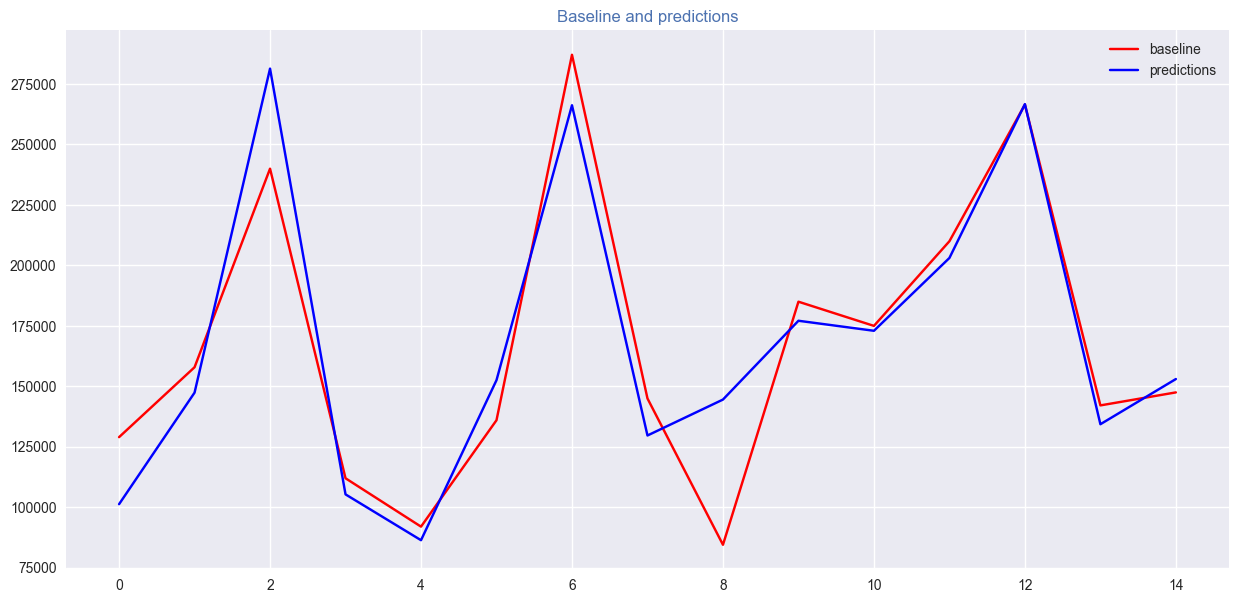

In [1]:
import pandas as pd
import tensorflow as tf
from constants import target_name, x_path, y_path, x_test_path, y_test_path, preprocessed_data
from libs.simple_processing import separate_target, split_train_test
from xgboost import XGBRegressor
from sklearn import metrics
# import sys, imp
# imp.reload(sys.modules['libs.simple_plotter'])
from libs.simple_plotter import plot_model_history

df = pd.read_csv(preprocessed_data)

length = int(len(df) * 0.99)
print("Dane testowe: ", length)

# Test data taken from the end of the dataset
TEST = df[length:]
DATA = df[:length]

X, y = separate_target(DATA, target_name)
Xt, yt = separate_target(TEST, target_name)

X.to_csv(x_path, index=False)
y.to_csv(y_path, index=False)
Xt.to_csv(x_test_path, index=False)
yt.to_csv(y_test_path, index=False)

X_train, X_valid, y_train, y_valid = split_train_test(X, y, train_size=0.65)

model = XGBRegressor(n_estimators=300
                     , learning_rate=0.03
                     , max_depth=10
                     , num_parallel_tree=10
                     )
model.fit(X_train, y_train)

score = model.score(X_valid, y_valid)
print("Score: ", score)

ypred = model.predict(Xt)
print('Test Data MAE :', metrics.mean_absolute_error(yt, ypred))
print('Test Data MAE % :', metrics.mean_absolute_percentage_error(yt, ypred))

plot_model_history(yt, ypred, "baseline", "predictions")

In [2]:
df

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,65.0,8450,1,1,3,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,4,80.0,9600,1,1,3,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,9,68.0,11250,1,1,0,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,10,60.0,9550,1,1,0,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,9,84.0,14260,1,1,0,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,62.0,7917,1,1,3,0,6,4,1999,...,0,0,0,1,0,0,0,0,1,0
1456,4,85.0,13175,1,1,3,0,6,5,1978,...,0,0,0,1,0,0,0,0,1,0
1457,10,66.0,9042,1,1,3,0,7,8,1941,...,0,0,0,1,0,0,0,0,1,0
1458,4,68.0,9717,1,1,3,0,5,5,1950,...,0,0,0,1,0,0,0,0,1,0


Dane testowe:  217
Score:  0.889520710105016
Test Data MAE % : 0.12075185471990196


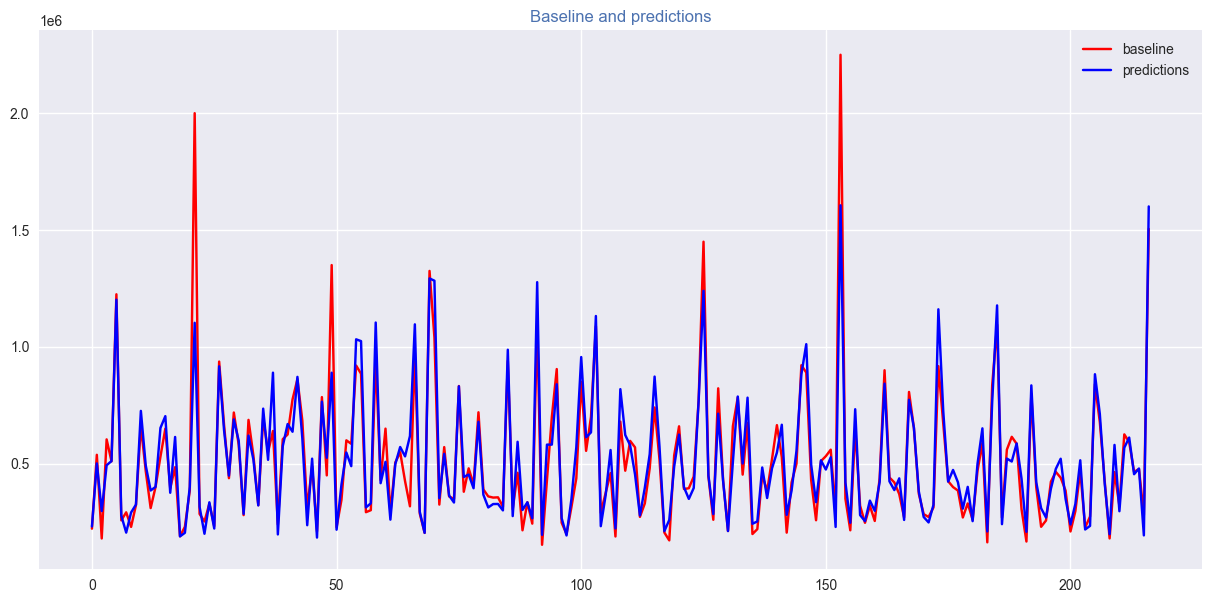

In [2]:
import pandas as pd
import tensorflow as tf
from constants import target_name, x_path, y_path, x_test_path, y_test_path, preprocessed_data
from libs.simple_processing import separate_target, split_train_test
from xgboost import XGBRegressor
from sklearn import metrics
# import sys, imp
# imp.reload(sys.modules['libs.simple_plotter'])
from libs.simple_plotter import plot_model_history

df = pd.read_csv(preprocessed_data)

length = int(len(df) * 0.99)
split_at = len(df) - length

print("Dane testowe: ", split_at)

# Test data taken from the beginning of the dataset
TEST = df[:split_at]
DATA = df[split_at:]

X, y = separate_target(DATA, target_name)
Xt, yt = separate_target(TEST, target_name)

X.to_csv(x_path, index=False)
y.to_csv(y_path, index=False)
Xt.to_csv(x_test_path, index=False)
yt.to_csv(y_test_path, index=False)

X_train, X_valid, y_train, y_valid = split_train_test(X, y, train_size=0.65)

tf.random.set_seed(7)

model = XGBRegressor(n_estimators=400
                     , learning_rate=0.03
                     , max_depth=10
                     , num_parallel_tree=10
                     )
model.fit(X_train, y_train)

score = model.score(X_valid, y_valid)
print("Score: ", score)

ypred = model.predict(Xt)
print('Test Data MAE % :', metrics.mean_absolute_percentage_error(yt, ypred))

plot_model_history(yt, ypred, "baseline", "predictions")

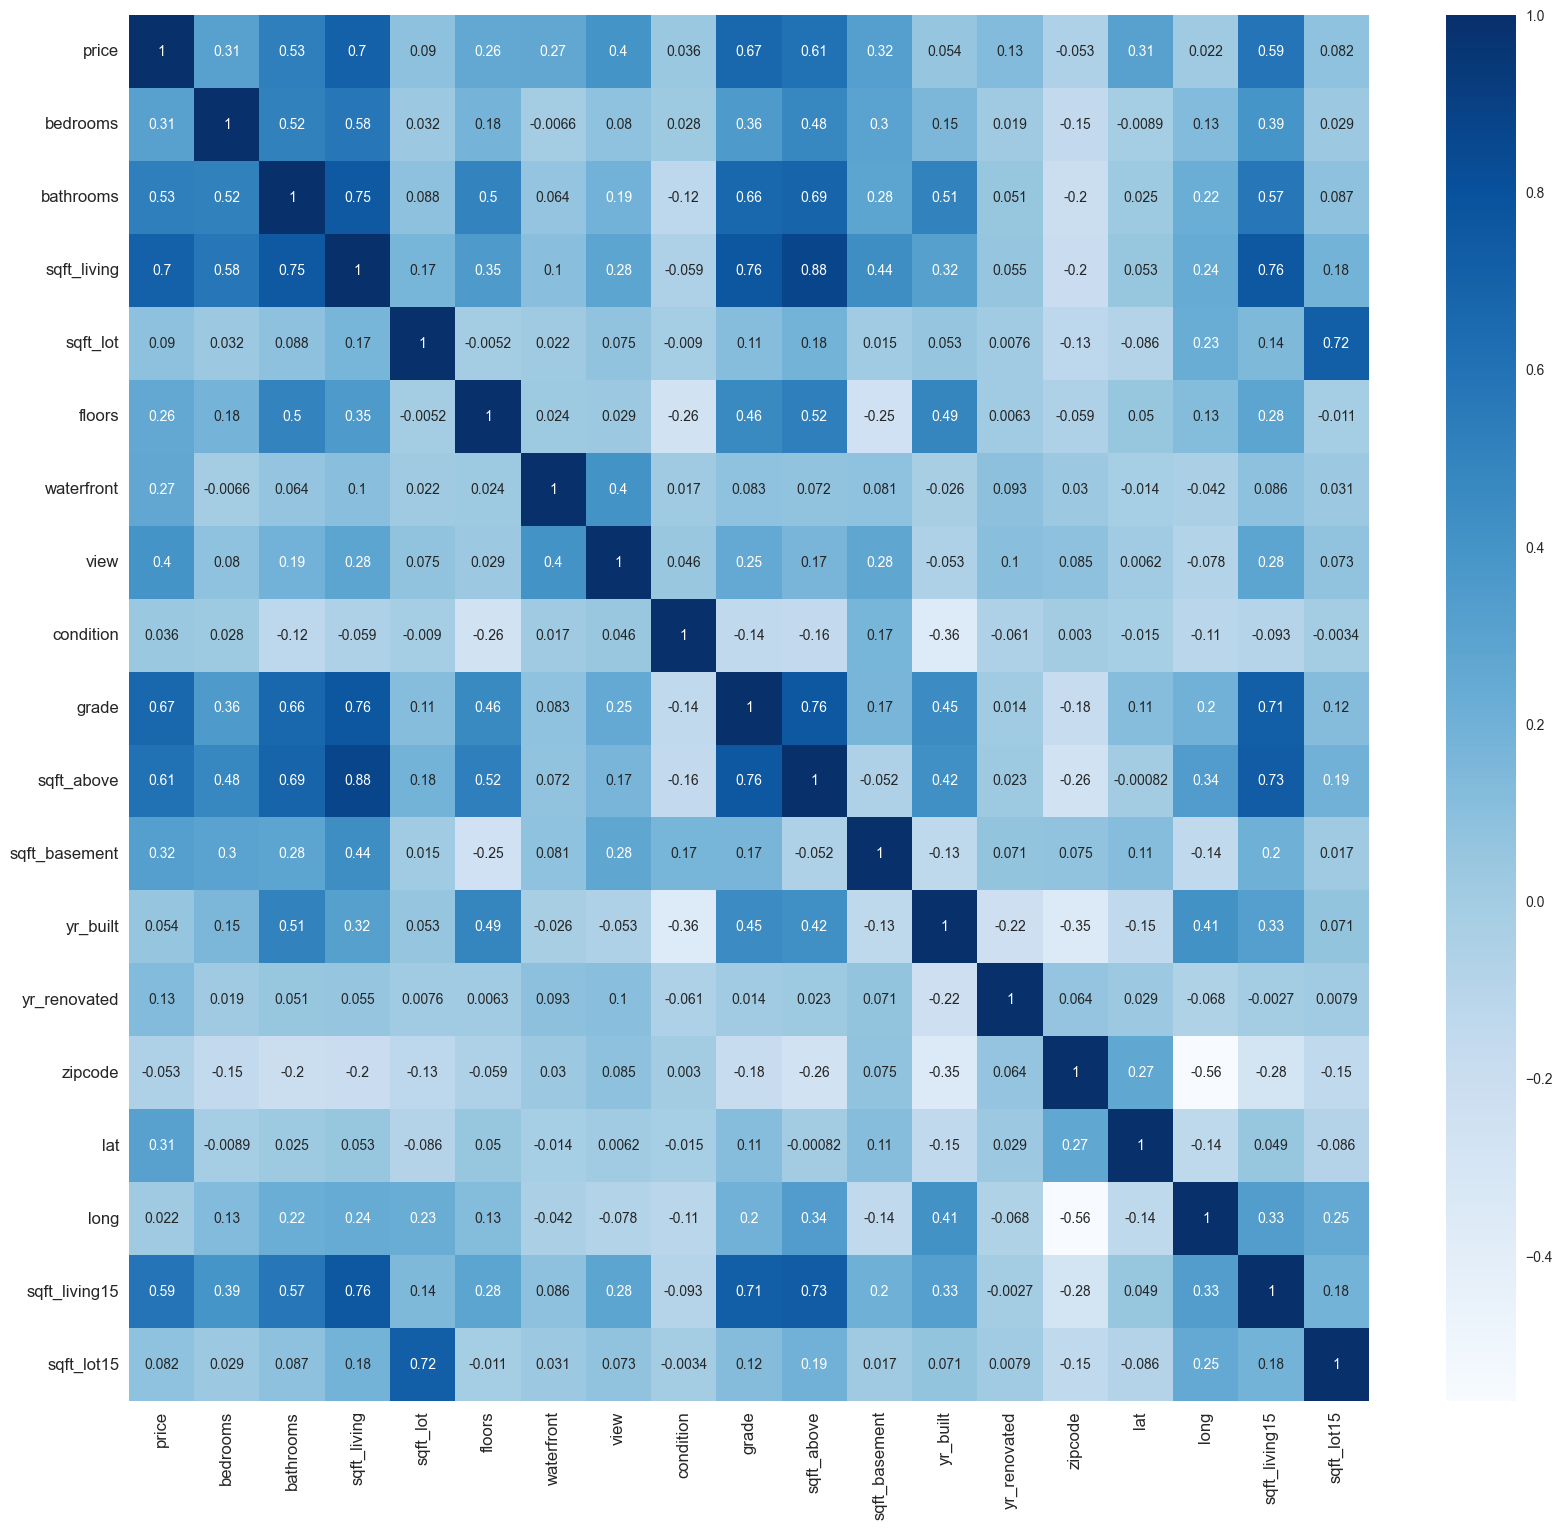

In [3]:
from libs.simple_analyzer import simple_heatmap

simple_heatmap(df)